In [1]:
import numpy as np
import xalglib
import matplotlib.pyplot as plt

## 2a)
Wir sollen $$h=\frac{H}{\hbar\omega}=\left(\frac{1}{2} \Pi^2+\frac{1}{2} Q^2+\lambda Q^4\right)$$ berechnen. Aus der Präsenzübung wissen wir: $h_{n,m}=(h_0)_{nm}+\lambda Q^4_{nm}$ mit $h_0=\left(n+\frac{1}{2}\right)\delta_{nm}$. Berechnen wir also zunächst noch $Q^4$ 
<math>\begin{align}
    <\psi_n | Q^4 | \psi_m> = \frac{1}{4} <\psi_n &| (a^{\dagger} + a)^4 | \psi_m>\\
        = \frac{1}{4} <\psi_n &| (a^{\dagger}a^{\dagger}+a^{\dagger}a+aa^{\dagger} + aa)^2 | \psi_m>\\
        = \frac{1}{4} <\psi_n &| (a^{\dagger}a^{\dagger}a^{\dagger}a^{\dagger}+a^{\dagger}a^{\dagger}a^{\dagger}a+a^{\dagger}a^{\dagger}aa^{\dagger} + a^{\dagger}a^{\dagger}aa\\
                               &+a^{\dagger}aa^{\dagger}a^{\dagger}+a^{\dagger}aa^{\dagger}a+a^{\dagger}aaa^{\dagger} + a^{\dagger}aaa\\
                               &+aa^{\dagger}a^{\dagger}a^{\dagger}+aa^{\dagger}a^{\dagger}a+aa^{\dagger}aa^{\dagger} + aa^{\dagger}aa\\
                               &+aaa^{\dagger}a^{\dagger}+aaa^{\dagger}a+aaaa^{\dagger} + aaaa) | \psi_m>\\
\end{align}</math>
        
hier nutzen wir jetzt, dass $a|\psi_n>=\sqrt{n+1}|\psi_{n+1}>$ und $a^\dagger|\psi_n>=\sqrt{n}|\psi_{n-1}>$. Die zwischenschirtte sind sehr lästig zu techen, ich hoffe du glaubst uns, das wir das alles ausmultiplizieren können. Am Ende kommen wir auf:

<math>\begin{align}
    <\psi_n | Q^4 | \psi_m> = &\frac{1}{4} ( \delta_{n,m+4} \sqrt{(m+1)(m+2)(m+3)(m+4)}\\
        &+ \delta_{n,m+2} \sqrt{(m+1)(m+2)}(4m+6))\\
        &+ \delta_{n,m} (6m^2 + 6m + 3)\\
        &+ \delta_{n,m-2} (\sqrt{m(m-1)} (4m - 2))\\
        &+ \delta_{n,m-4} \sqrt{m(m-1)(m-2)(m-3)})
\end{align}</math>
    
Damit ergibt sich $h_{n,m}$ zu: 
<math>\begin{align}
    h_{n,m} = &\frac{1}{4} ( \delta_{n,m+4} \lambda \sqrt{(m+1)(m+2)(m+3)(m+4)}\\
        &+ \delta_{n,m+2} \lambda \sqrt{(m+1)(m+2)}(4m+6))\\
        &+ \delta_{n,m} \left[\left(n+\frac{1}{2}\right)+\lambda(6m^2 + 6m + 3)\right]\\
        &+ \delta_{n,m-2} \lambda(\sqrt{m(m-1)} (4m - 2))\\
        &+ \delta_{n,m-4} \lambda\sqrt{m(m-1)(m-2)(m-3)})
\end{align}</math>

## 2b)
Zunächst definieren wir uns ein paar hilfreiche Funktionen. Die Funtkion get_h liefert die Matrix von h bei gegebenem N zurück. 
Die Funtkion get_h_diag liefert die Matrix, bestehend aus den Diagonalelementen von h, bei gegebenem N zurück. Die Funktion check_symmetric üüberprüft, ob die Matrix im Rahmen der Rundungsfehler symmetrisch ist. 

In [2]:
N=15
lamb=0.1
def get_h(N):
    h=np.zeros((N,N))
    for i in range(N):
        #1.Term stammt von ungestörtem Oszillator, 2. Term aus Q^4
        h[i][i]=((i)+0.5)+lamb*(6*i**2+6*i+3)
        #Der rest der Terme stammt aus Q^4
        if i+4<N:
            h[i][i+4]=lamb*(np.sqrt((i+1)*(i+2)*(i+3)*(i+4)))
            h[i+4][i]=lamb*(np.sqrt((i+1)*(i+2)*(i+3)*(i+4)))
        if i+2<N:
            h[i][i+2]=lamb*(np.sqrt((i+1)*(i+2))*(4*i+6))
            h[i+2][i]=lamb*(np.sqrt((i+1)*(i+2))*(4*i+6))
    return h

def get_h_diag(N):
    h=np.zeros((N,N))
    for i in range(N):
        h[i][i]=((i)+0.5)+lamb*(6*i**2+6*i+3)
    return h


            
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)


Nun bestimmen wir die Eigenwerte und Eigenvektoren für N=15 bis N=30. Dabei wird die Funktion für symmetrische Matrizen aus Numpy genommen, da die verwendung recht unkompliziert ist. Dann überprüfen wir die Ergebniss der Eigenwerte und Vektoren noch durch einfaches einsetzen und Betrachtung der Norm der Differenz. 

In [3]:
#N_range
D=[] #Liste mit Arrays, in denen die eigenwerte für gegebene N stehen
N_list=[] #Liste mit Arrays, in denen N steht, Dimension ist am ende identisch mit D
diff_norm_list=[] #Liste aus Arrays, in jedem Array steht |h\vec{x}-\lambda \vec{x}| mit x Eigenvektor und \lambda EW
for N in range(15,31): 
    h=get_h(N)
    #Berechne Eigenwerte und Eigenvektoren
    eva, evec2 = np.linalg.eigh(h)
    #Eigenvektoren werden als Spaltenvektoren zurückgegeben
    evec=evec2.T
    
    
    N_array=np.ones([len(eva)])*N
    N_list.append(N_array)
    D.append(eva)
    #print(check_symmetric(h))
    
    # Überprüfe Eigenwerte/Eigenvektoren,
    # Dazu führe Produkt von Matrix h und Eig.vektor evec aus
    # und vergleiche mit Produkt aus Eigenwert mit Eig.vektor
    diff_norm_l=np.array([])
    for i in range(len(eva)):
        c=h.dot(evec[i])
        diff=np.array(c)-eva[i]*np.array(evec[i])
        diff_norm_l=np.append(diff_norm_l,np.linalg.norm(diff))
    diff_norm_list.append(diff_norm_l)


Im folgenden werden Die Ergebnisse geplottet. Im ersten Diagramm sieht man die Eigenwerte in abhängigkeit von N, im Zweiten die Fehler der Eigenwerte und eigenvektoren in der Norm. 

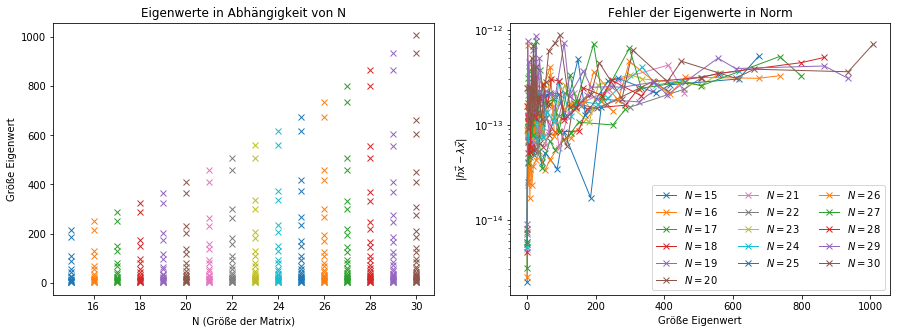

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(121)
for i in range(16):
    plt.plot(N_list[i], D[i], linewidth=0, marker='x',label="$N = %d $" % N_list[i][0])
#plt.yscale('log')
#plt.legend()
plt.title('Eigenwerte in Abhängigkeit von N')
plt.xlabel('N (Größe der Matrix)')
plt.ylabel('Größe Eigenwert')

plt.subplot(122)
for i in range(16):
    plt.plot(D[i], diff_norm_list[i], linewidth=1, marker='x', label="$N = %d $" % N_list[i][0])
plt.title('Fehler der Eigenwerte in Norm')
plt.ylabel(r'$|h\vec{x}-\lambda \vec{x}|$')
plt.xlabel('Größe Eigenwert')
plt.legend(ncol=3)
plt.yscale('log')
plt.show()

## 2c)
Im folgenden führen wir das ganze nocheinaml für den Fall einer Diagonalen MAtrix durch. Dabei sind die analytischen Eignewerte einfach dei Diagonalelemente von h_diag. Analog zu oben wir das Ganze auch nochmal geplottet. Es fällt auf, das hier die Ergebnisse der Vektoren und Eigenwerte perfekt zueinander passen und die Differnzen in der Norm null sind. 

In [5]:
#N_range
D_diag=[]
N_list_diag=[]
diff_norm_list_diag=[]
for N in range(15,31): 
    h=get_h_diag(N)    
    #Berechne Eigenwerte und Eigenvektoren
    eva, evec2 = np.linalg.eigh(h)
    #Eigenvektoren werden als Spaltenvektoren zurückgegeben
    evec=evec2.T
    
    
    N_array=np.ones([len(eva)])*N
    N_list_diag.append(N_array)
    D_diag.append(eva)
    #print(check_symmetric(h))
    
    diff_norm_l=np.array([])
    for i in range(len(eva)):
        c=h.dot(evec[i])
        diff=np.array(c)-eva[i]*np.array(evec[i])
        diff_norm_l=np.append(diff_norm_l,np.linalg.norm(diff))
    diff_norm_list_diag.append(diff_norm_l)

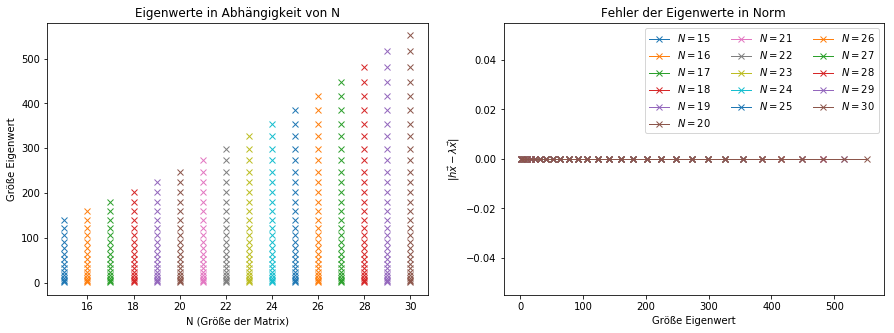

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
for i in range(16):
    plt.plot(N_list_diag[i], D_diag[i], linewidth=0, marker='x',label="$N = %d $" % N_list[i][0])
#plt.yscale('log')
#plt.legend()
plt.title('Eigenwerte in Abhängigkeit von N')
plt.xlabel('N (Größe der Matrix)')
plt.ylabel('Größe Eigenwert')

plt.subplot(122)
for i in range(16):
    plt.plot(D_diag[i], diff_norm_list_diag[i], linewidth=1, marker='x', label="$N = %d $" % N_list[i][0])
plt.title('Fehler der Eigenwerte in Norm')
plt.ylabel(r'$|h\vec{x}-\lambda \vec{x}|$')
plt.xlabel('Größe Eigenwert')
plt.legend(ncol=3)
#plt.yscale('log')
plt.show()

Im folgenden Plotten wir die Eigenwerte aus b), der exakten Lösung, und c), der genäherten Lösung mit nur Diagonalelemten, nocheinmal nebeneinander. Links stehen die Werte aus b), rechts aus c).Es fällt auf, dass sich die Eigenwerte von h mit zunehmendem N stärker unterscheiden. Insbesondere erkennt man, dass die größten Eigenwerte aus b) irgendwann doppelt so groß wie die aus c) werden. Zudem erkennt man bei den Weten aus c) ein recht kontinuierliches Spektrum, bei den Werten von b) erkennt man 2er Pärchen. 

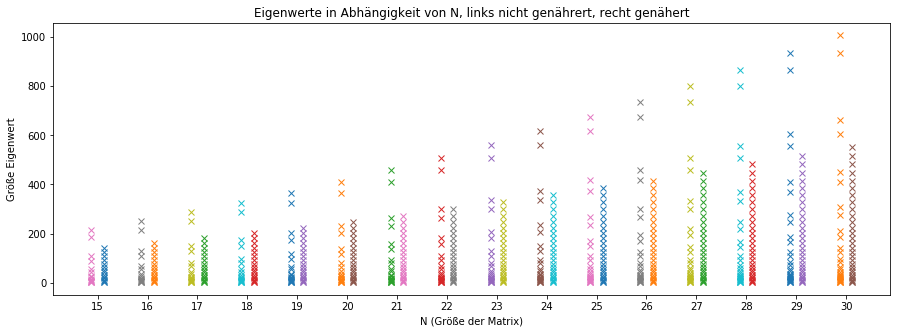

In [7]:
plt.figure(figsize=(15,5))
for i in range(16):
    plt.plot(N_list_diag[i]+0.125, D_diag[i], linewidth=0, marker='x',label="$N = %d $" % N_list[i][0])

for i in range(16):
    plt.plot(N_list[i]-0.125, D[i], linewidth=0, marker='x',label="$N = %d $" % N_list[i][0])
    plt.xticks(np.linspace(15,30,16))

plt.title('Eigenwerte in Abhängigkeit von N, links nicht genährert, recht genähert')
plt.xlabel('N (Größe der Matrix)')
plt.ylabel('Größe Eigenwert')
plt.show()

## 2d)

Wir hatten für diese Aufgabe nur einen Ansatz keine vollständige Lösung. Aus der Gleichung für den Hamiltonoperator können wir herauslesen, dass wir ihn auch in folgender Form schreiben können:

$$H=\frac{\hat{p}^2}{2m} + \frac{1}{2}m\omega^2 \hat{x} + \frac{4}{\hbar}\lambda m^2 \omega^3 \hat{x}^4$$

Wobei der Ortsoperator gegeben ist durch:

$$ \hat{x} = \sqrt {\frac{\hbar}{2m\omega}} (a+a^\dagger)$$

Aus dem Potential $V(x) = \frac{1}{2}m\omega^2 x + \frac{4}{\hbar}\lambda m^2 \omega^3 x^4$ folgt die Wellenzahl:

$$ K(x)=\frac{2m}{\hbar}(E-V(x))^{\frac{1}{2}}$$

Bestimmt man nun die Umkehrpunkte x1,x2 und integriert K(x) darüber, so kann man mittels der Quantisierungsbedingung (für den harmonischen Oszillator wäre dies $\int K(x) = \pi (n+\frac{1}{2})$,für den anharmonischen weiß ich leider nicht ob das die gleiche Bedingung ist), die Energieeigenwerte bestimmen.